In [1]:
"""
Using the prophet library to perform a simple forecast for COVID-19 cases in Ghana based on existing data
"""

'\nUsing the prophet library to perform a simple forecast for COVID-19 cases in Ghana based on existing data\n'

In [2]:
#importing libraries
import pandas as pd
from fbprophet import Prophet

In [3]:
# reading data
df = pd.read_csv("data.csv")

In [4]:
df.head()

,ds,y
0,2020-03-11,0
1,2020-03-12,2
2,2020-03-13,2
3,2020-03-14,2
4,2020-02-15,6


In [5]:
# fitting the model
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
# making future forecasts
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
412,2021-04-26
413,2021-04-27
414,2021-04-28
415,2021-04-29
416,2021-04-30


In [7]:
future.head()

,ds
0,2020-02-15
1,2020-03-11
2,2020-03-12
3,2020-03-13
4,2020-03-14


In [8]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-02-15,-908.854622,-1317.965398,-492.872561
1,2020-03-11,-31.924799,-473.102002,403.856832
2,2020-03-12,-152.010971,-588.415949,273.105703
3,2020-03-13,-243.038310,-659.231310,221.790473
4,2020-03-14,-77.836044,-514.447712,355.874702


In [9]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
412,2021-04-26,11993.321828,11493.037724,12353.542903,11993.231649,11993.412895,-47.453984,-47.453984,-47.453984,-47.453984,-47.453984,-47.453984,0.0,0.0,0.0,11945.867844
413,2021-04-27,12023.001597,11520.433075,12407.661123,12022.911133,12023.093026,-40.963570,-40.963570,-40.963570,-40.963570,-40.963570,-40.963570,0.0,0.0,0.0,11982.038027
414,2021-04-28,12052.681366,11814.169015,12636.620458,12052.590634,12052.773155,173.124476,173.124476,173.124476,173.124476,173.124476,173.124476,0.0,0.0,0.0,12225.805842
415,2021-04-29,12082.361134,11651.241213,12557.549751,12082.270126,12082.453284,23.359069,23.359069,23.359069,23.359069,23.359069,23.359069,0.0,0.0,0.0,12105.720204
416,2021-04-30,12112.040903,11550.022884,12460.711042,12111.949623,12112.133410,-97.347505,-97.347505,-97.347505,-97.347505,-97.347505,-97.347505,0.0,0.0,0.0,12014.693398


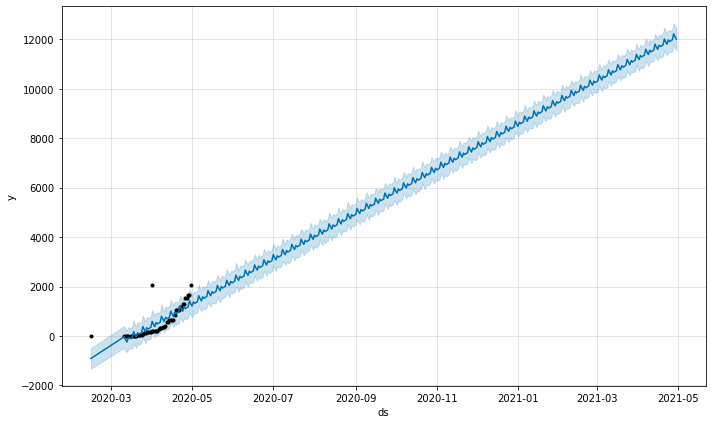

In [10]:
fig1 = model.plot(forecast)

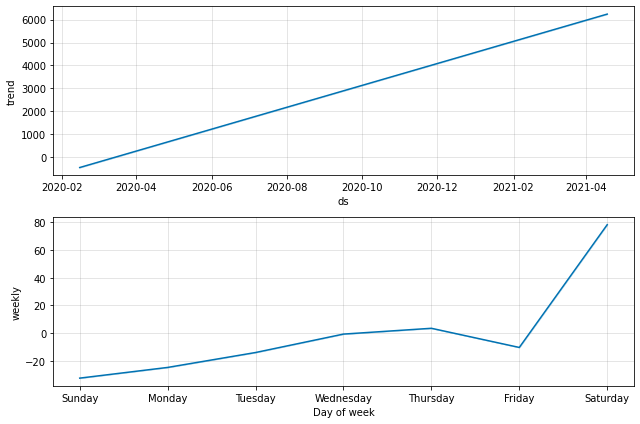

In [12]:
fig2 = model.plot_components(forecast)

In [13]:
to_csv = forecast[['ds','yhat']]

In [14]:
to_csv.head()

,ds,yhat
0,2020-02-15,-377.850379
1,2020-03-11,-65.627707
2,2020-03-12,-45.798255
3,2020-03-13,-43.968654
4,2020-03-14,60.168609


In [16]:
to_csv.to_csv('forecast.csv', sep=',')

In [17]:
"""
doing same with china dataset
"""

'\ndoing same with china dataset\n'

In [18]:
df1 = pd.read_csv('china.csv')
df1.head()

,ds,y
0,2020-01-22,444
1,2020-01-23,444
2,2020-01-24,549
3,2020-01-25,761
4,2020-01-26,1058


In [19]:
model1 = Prophet()
model1.fit(df1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
future1 = model1.make_future_dataframe(periods=365)
future1.tail()

,ds
447,2021-04-13
448,2021-04-14
449,2021-04-15
450,2021-04-16
451,2021-04-17


In [21]:
forecast1 = model1.predict(future1)
forecast1[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
447,2021-04-13,79856.729864,-312155.919631,467917.131680
448,2021-04-14,80776.011396,-313109.308555,468143.487900
449,2021-04-15,80491.433233,-318560.094466,470868.692263
450,2021-04-16,80127.093164,-318830.893111,474823.621049
451,2021-04-17,79985.155237,-318210.714324,474473.169653


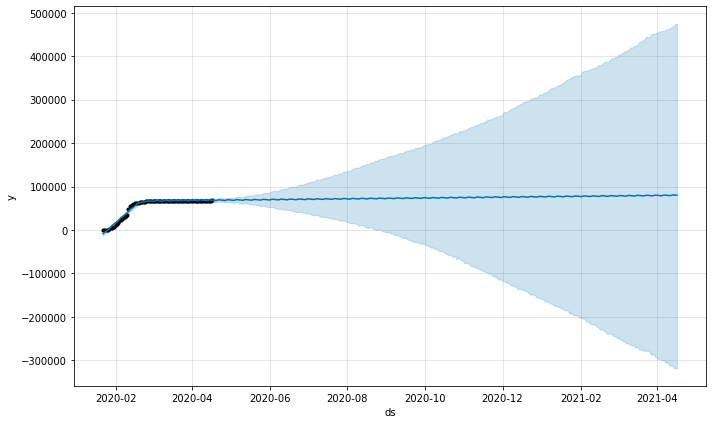

In [22]:
fig1_1 = model1.plot(forecast1)

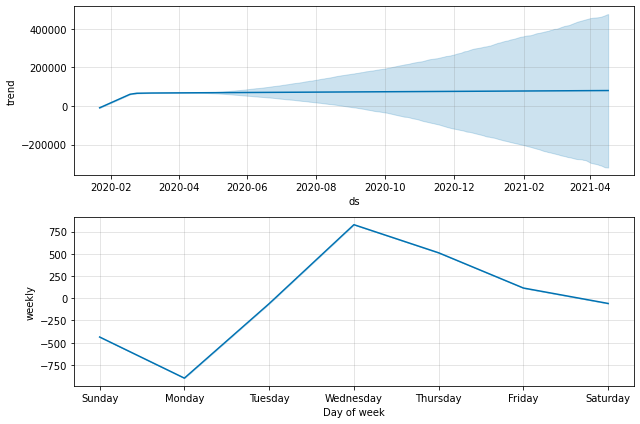

In [23]:
fig_2_2 = model1.plot_components(forecast1)